### **Ενσωμάτωση μηχανισμών προσοχής στο CNN μοντέλο**


#### **Απλό CNN μοντέλο**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import random 
import cv2

import keras
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid
from keras import layers
# from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from keras import initializers
from keras.models import Sequential

In [2]:
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [10]:
train_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train"
test_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test"

In [5]:
train_batches = ImageDataGenerator(validation_split=0.1) \
                .flow_from_directory(directory=train_path,  
                                     classes = ['NonDemented', 'VeryMildDemented', 
                                                'MildDemented', 'ModerateDemented'], 
                                     subset='training',
                                     batch_size=10)

validation_batches = ImageDataGenerator(validation_split=0.1) \
                     .flow_from_directory(directory=train_path, 
                                          classes = ['NonDemented', 'VeryMildDemented', 
                                                     'MildDemented', 'ModerateDemented'], 
                                          subset='validation',
                                          batch_size=10)
                
test_batches = ImageDataGenerator() \
                    .flow_from_directory(directory=test_path, 
                                         classes = ['NonDemented', 'VeryMildDemented', 
                                                    'MildDemented', 'ModerateDemented'], 
                                         batch_size=10, 
                                         shuffle=False)

Found 4610 images belonging to 4 classes.
Found 511 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


<BarContainer object of 4 artists>

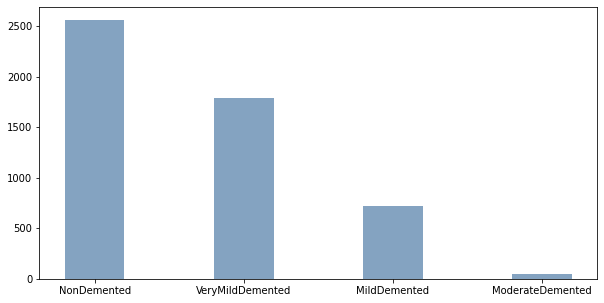

In [6]:
data = {'NonDemented':      0, 
        'VeryMildDemented': 0, 
        'MildDemented':     0,
        'ModerateDemented': 0}

for cls in os.listdir(train_path):
    for img in os.listdir(train_path + '/' + cls):
        data[cls] = data[cls] + 1

keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(keys, values, color=(0.2, 0.4, 0.6, 0.6), width = 0.4)

In [3]:
IMG_SIZE = 224
n_classes = 4

model = Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE),
                    layers.Rescaling(1./255),
                    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                                  padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,3)),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(filters=64, kernel_size=(3, 3), 
                                  activation='relu', padding = 'same'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(filters=128, kernel_size=(3, 3), 
                                  activation='relu', padding = 'same'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Conv2D(filters=256, kernel_size=(3, 3), 
                                  activation='relu', padding = 'same'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2, 2)),
                    layers.Flatten(),
                    layers.Dense(300, activation='relu'),
                    layers.Dense(150, activation='relu'),
                    layers.Dropout(0.25),
                    layers.Dense(n_classes, activation='softmax')])

In [8]:
METRICS = [keras.metrics.CategoricalAccuracy(name='accuracy'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.AUC(name='auc')]

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=METRICS)

In [10]:
EPOCHS = 50
BATCH_SIZE = 8

In [11]:
history = model.fit(x=train_batches,
                    validation_data=validation_batches,
                    steps_per_epoch=len(train_batches),
                    validation_steps=len(validation_batches),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE, 
                    verbose=2)

2022-06-06 11:41:07.696715: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-06-06 11:41:13.018089: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
461/461 - 29s - loss: 1.1653 - accuracy: 0.5579 - precision: 0.5984 - recall: 0.4616 - auc: 0.8128 - val_loss: 0.9771 - val_accuracy: 0.5245 - val_precision: 0.5747 - val_recall: 0.4442 - val_auc: 0.8309
Epoch 2/50
461/461 - 11s - loss: 0.6178 - accuracy: 0.7286 - precision: 0.7660 - recall: 0.6766 - auc: 0.9309 - val_loss: 0.7233 - val_accuracy: 0.6321 - val_precision: 0.6577 - val_recall: 0.5753 - val_auc: 0.8978
Epoch 3/50
461/461 - 11s - loss: 0.2416 - accuracy: 0.9167 - precision: 0.9315 - recall: 0.9082 - auc: 0.9909 - val_loss: 0.7226 - val_accuracy: 0.6986 - val_precision: 0.7016 - val_recall: 0.6947 - val_auc: 0.9218
Epoch 4/50
461/461 - 10s - loss: 0.0924 - accuracy: 0.9694 - precision: 0.9783 - recall: 0.9670 - auc: 0.9986 - val_loss: 0.4081 - val_accuracy: 0.8160 - val_precision: 0.8238 - val_recall: 0.8141 - val_auc: 0.9725
Epoch 5/50
461/461 - 12s - loss: 0.0607 - accuracy: 0.9813 - precision: 0.9862 - recall: 0.9761 - auc: 0.9994 - val_loss: 0.2321 - val_accur

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, None)    0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, None)    0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      2

In [13]:
def plot_loss(history, n):
    plt.semilogy(history.epoch, history.history['loss'], label='Train')
    plt.semilogy(history.epoch, history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

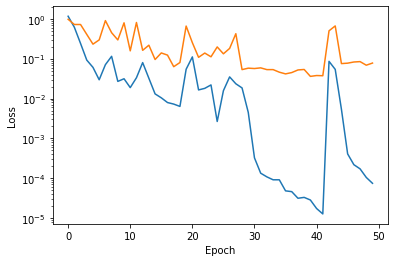

In [14]:
plot_loss(history, 0)

In [15]:
results = model.evaluate(test_batches, verbose=0)

for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)

loss :  1.558251976966858
accuracy :  0.6880375146865845
precision :  0.6900078654289246
recall :  0.6856919527053833
auc :  0.8743016719818115


#### **Ενσωμάτωση μηχανισμών προσοχής**

##### Channel Attention: ECA-Net 

In [16]:
def ECA(x):
    k_size = 3 
    squeeze = tf.reduce_mean(x,(2,3),keepdims=False)
    squeeze = tf.expand_dims(squeeze, axis=1)
    attn = layers.Conv1D(filters=1,
    kernel_size=k_size,
    padding='same',
    kernel_initializer='random_normal',
    use_bias=False)(squeeze)

    attn = tf.expand_dims(tf.transpose(attn, [0, 2, 1]), 3)
    attn = tf.math.sigmoid(attn)
    scale = x * attn
    return x * attn

In [17]:
IMG_SIZE = 224
n_classes = 4

inp = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
x1 = layers.Resizing(IMG_SIZE, IMG_SIZE)(inp)
x2 = layers.Rescaling(1./255)(x1)
x3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                   padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,3))(x2)
x4 = ECA(x3)
x5 = layers.BatchNormalization(axis=-1)(x4)
x6 = layers.MaxPool2D(pool_size=(2, 2))(x5)
x7 = layers.Conv2D(filters=64, kernel_size=(3, 3), 
                   activation='relu', padding = 'same')(x6)
x8 = ECA(x7)
x9 = layers.BatchNormalization(axis=-1)(x8)
x10 = layers.MaxPool2D(pool_size=(2, 2))(x9)
x11 = layers.Conv2D(filters=128, kernel_size=(3, 3), 
                    activation='relu', padding = 'same')(x10)
x12 = ECA(x11)
x13 = layers.BatchNormalization(axis=-1)(x12)
x14 = layers.MaxPool2D(pool_size=(2, 2))(x13)
x15 = layers.Conv2D(filters=256, kernel_size=(3, 3), 
                      activation='relu', padding = 'same')(x14)
x16 = ECA(x15)
x17 = layers.BatchNormalization(axis=-1)(x16)
x18 = layers.MaxPool2D(pool_size=(2, 2))(x17)
y1 = layers.Flatten()(x18)
y2 = layers.Dense(300, activation='relu')(y1)
y3 = layers.Dense(150, activation='relu')(y2)
y4 = layers.Dropout(0.25)(y3)
y = layers.Dense(n_classes, activation='softmax')(y4)   


model_ECA = tf.keras.Model(inp, y)

In [18]:
model_ECA.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=METRICS)

In [19]:
history_ECA = model_ECA.fit(x=train_batches,
                            validation_data=validation_batches,
                            steps_per_epoch=len(train_batches),
                            validation_steps=len(validation_batches),
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE, 
                            verbose=2)

Epoch 1/50
461/461 - 14s - loss: 1.2826 - accuracy: 0.5544 - precision: 0.5956 - recall: 0.4824 - auc: 0.8036 - val_loss: 1.1594 - val_accuracy: 0.4716 - val_precision: 0.6475 - val_recall: 0.3738 - val_auc: 0.7509
Epoch 2/50
461/461 - 13s - loss: 0.7506 - accuracy: 0.6768 - precision: 0.7632 - recall: 0.5696 - auc: 0.9000 - val_loss: 0.7114 - val_accuracy: 0.6830 - val_precision: 0.7037 - val_recall: 0.6693 - val_auc: 0.9113
Epoch 3/50
461/461 - 12s - loss: 0.2911 - accuracy: 0.9000 - precision: 0.9258 - recall: 0.8766 - auc: 0.9869 - val_loss: 0.3195 - val_accuracy: 0.8885 - val_precision: 0.9124 - val_recall: 0.8767 - val_auc: 0.9826
Epoch 4/50
461/461 - 13s - loss: 0.0807 - accuracy: 0.9774 - precision: 0.9864 - recall: 0.9733 - auc: 0.9993 - val_loss: 0.2314 - val_accuracy: 0.9022 - val_precision: 0.9175 - val_recall: 0.8924 - val_auc: 0.9908
Epoch 5/50
461/461 - 12s - loss: 0.0984 - accuracy: 0.9644 - precision: 0.9728 - recall: 0.9623 - auc: 0.9980 - val_loss: 0.1442 - val_accur

In [20]:
model_ECA.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
resizing_1 (Resizing)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           resizing_1[0][0]                 
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 224, 224, 32) 896         rescaling_1[0][0]                
______________________________________________________________________________________________

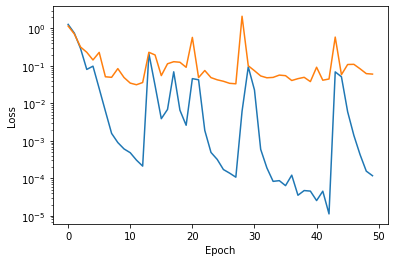

In [21]:
plot_loss(history_ECA, 0)

In [22]:
results = model_ECA.evaluate(test_batches, verbose=0)

for name, value in zip(model_ECA.metrics_names, results):
    print(name, ': ', value)

loss :  1.4463093280792236
accuracy :  0.7068021893501282
precision :  0.7107958793640137
recall :  0.7052384614944458
auc :  0.8775234818458557


##### Channel & Spatial Attention: CBAM 

In [23]:
def cbam_block(cbam_feature, ratio=8):
    """Contains the implementation of Convolutional Block Attention Module(CBAM) block.
    As described in https://arxiv.org/abs/1807.06521.
    """
    
    cbam_feature = channel_attention(cbam_feature, ratio)
    cbam_feature = spatial_attention(cbam_feature)
    return cbam_feature

def channel_attention(input_feature, ratio=8):
    
    channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    channel = input_feature.shape[channel_axis]
    
    shared_layer_one = Dense(channel//ratio,
                             activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    shared_layer_two = Dense(channel,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')
    
    avg_pool = GlobalAveragePooling2D()(input_feature)    
    avg_pool = Reshape((1,1,channel))(avg_pool)
    assert avg_pool.shape[1:] == (1,1,channel)
    avg_pool = shared_layer_one(avg_pool)
    assert avg_pool.shape[1:] == (1,1,channel//ratio)
    avg_pool = shared_layer_two(avg_pool)
    assert avg_pool.shape[1:] == (1,1,channel)
    
    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1,1,channel))(max_pool)
    assert max_pool.shape[1:] == (1,1,channel)
    max_pool = shared_layer_one(max_pool)
    assert max_pool.shape[1:] == (1,1,channel//ratio)
    max_pool = shared_layer_two(max_pool)
    assert max_pool.shape[1:] == (1,1,channel)
    
    cbam_feature = Add()([avg_pool,max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
    
    return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
    kernel_size = 7
    
    if K.image_data_format() == "channels_first":
        channel = input_feature.shape[1]
        cbam_feature = Permute((2,3,1))(input_feature)
    else:
        channel = input_feature.shape[-1]
        cbam_feature = input_feature

    avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
    assert avg_pool.shape[-1] == 1
    max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
    assert max_pool.shape[-1] == 1
    concat = Concatenate(axis=3)([avg_pool, max_pool])
    assert concat.shape[-1] == 2
    cbam_feature = Conv2D(filters = 1,
                    kernel_size=kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)(concat)	
    assert cbam_feature.shape[-1] == 1
    
    if K.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)
    
    return multiply([input_feature, cbam_feature])

In [24]:
IMG_SIZE = 224
n_classes = 4

inp = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
x1 = layers.Resizing(IMG_SIZE, IMG_SIZE)(inp)
x2 = layers.Rescaling(1./255)(x1)
x3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                   padding = 'same', input_shape=(IMG_SIZE,IMG_SIZE,3))(x2)
x4 = cbam_block(x3)
x5 = layers.BatchNormalization(axis=-1)(x4)
x6 = layers.MaxPool2D(pool_size=(2, 2))(x5)
x7 = layers.Conv2D(filters=64, kernel_size=(3, 3), 
                   activation='relu', padding = 'same')(x6)
x8 = cbam_block(x7)
x9 = layers.BatchNormalization(axis=-1)(x8)
x10 = layers.MaxPool2D(pool_size=(2, 2))(x9)
x11 = layers.Conv2D(filters=128, kernel_size=(3, 3), 
                    activation='relu', padding = 'same')(x10)
x12 = cbam_block(x11)
x13 = layers.BatchNormalization(axis=-1)(x12)
x14 = layers.MaxPool2D(pool_size=(2, 2))(x13)
x15 = layers.Conv2D(filters=256, kernel_size=(3, 3), 
                      activation='relu', padding = 'same')(x14)
x16 = cbam_block(x15)
x17 = layers.BatchNormalization(axis=-1)(x16)
x18 = layers.MaxPool2D(pool_size=(2, 2))(x17)
y1 = layers.Flatten()(x18)
y2 = layers.Dense(300, activation='relu')(y1)
y3 = layers.Dense(150, activation='relu')(y2)
y4 = layers.Dropout(0.25)(y3)
y = layers.Dense(n_classes, activation='softmax')(y4)   


model_CBAM = tf.keras.Model(inp, y)

In [25]:
model_CBAM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                   loss='categorical_crossentropy', 
                   metrics=METRICS)

In [26]:
history_CBAM = model_CBAM.fit(x=train_batches,
                              validation_data=validation_batches,
                              steps_per_epoch=len(train_batches),
                              validation_steps=len(validation_batches),
                              epochs=EPOCHS,
                              batch_size=BATCH_SIZE, 
                              verbose=2)

Epoch 1/50
461/461 - 28s - loss: 1.0979 - accuracy: 0.5891 - precision: 0.6180 - recall: 0.5410 - auc: 0.8362 - val_loss: 3.2494 - val_accuracy: 0.5010 - val_precision: 0.5010 - val_recall: 0.5010 - val_auc: 0.7864
Epoch 2/50
461/461 - 24s - loss: 0.6355 - accuracy: 0.7371 - precision: 0.7695 - recall: 0.6857 - auc: 0.9285 - val_loss: 0.6280 - val_accuracy: 0.7221 - val_precision: 0.7532 - val_recall: 0.6986 - val_auc: 0.9313
Epoch 3/50
461/461 - 25s - loss: 0.3547 - accuracy: 0.8560 - precision: 0.8808 - recall: 0.8419 - auc: 0.9772 - val_loss: 0.6826 - val_accuracy: 0.7241 - val_precision: 0.7339 - val_recall: 0.7123 - val_auc: 0.9296
Epoch 4/50
461/461 - 24s - loss: 0.1981 - accuracy: 0.9284 - precision: 0.9357 - recall: 0.9213 - auc: 0.9921 - val_loss: 0.5530 - val_accuracy: 0.7769 - val_precision: 0.7853 - val_recall: 0.7730 - val_auc: 0.9526
Epoch 5/50
461/461 - 24s - loss: 0.1107 - accuracy: 0.9638 - precision: 0.9671 - recall: 0.9618 - auc: 0.9972 - val_loss: 0.3731 - val_accur

In [27]:
model_CBAM.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
resizing_2 (Resizing)           (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 224, 224, 3)  0           resizing_2[0][0]                 
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 224, 224, 32) 896         rescaling_2[0][0]                
____________________________________________________________________________________________

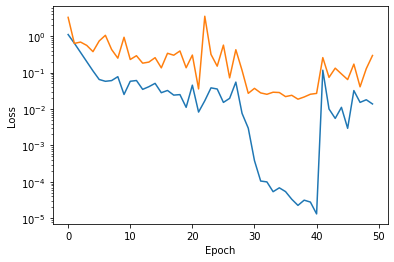

In [28]:
plot_loss(history_CBAM, 0)

In [29]:
results = model_CBAM.evaluate(test_batches, verbose=0)

for name, value in zip(model_CBAM.metrics_names, results):
    print(name, ': ', value)

loss :  2.0657761096954346
accuracy :  0.6864737868309021
precision :  0.6859827637672424
recall :  0.6849100589752197
auc :  0.860176682472229


In [30]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        if self.layerName is None:
            self.layerName = self.find_target_layer()
            
    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
        
    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = tf.keras.Model(
        inputs=[self.model.inputs],
        outputs=[self.model.get_layer(self.layerName).output,
                 self.model.output])
        
        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)
        
        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        
        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        
        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        image = np.asarray(image, np.float64)
        heatmap = np.asarray(heatmap, np.float64)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        return (heatmap, output)

In [31]:
def show_heatmap(model, img_path):
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    i = np.argmax(preds[0])
    label_to_class = {'NonDemented': 0,
                      'VeryMildDemented': 1,
                      'MildDemented': 2,
                      'ModerateDemented': 3}

    class_to_label = {v: k for k, v in label_to_class.items()}

    label = class_to_label[i]
    print(f'Predicted class: {label} | Prediction probability: {max(preds[0]) * 100}%')
    
    cam = GradCAM(model, i)
    heatmap = cam.compute_heatmap(image)

    (heatmap, output) = cam.overlay_heatmap(heatmap, image[0], alpha=0.5)
    
    output = output.astype(np.uint8)
    plt.imshow(output, interpolation='nearest')
    plt.show()

Predicted class: MildDemented | Prediction probability: 86.69216632843018%


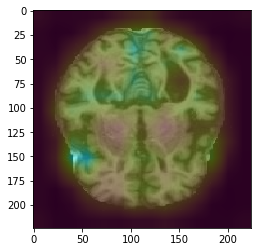

In [32]:
img_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg"
show_heatmap(model, img_path)

Predicted class: MildDemented | Prediction probability: 99.99969005584717%


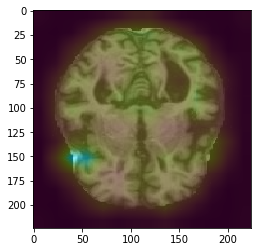

In [33]:
img_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg"
show_heatmap(model_ECA, img_path)

Predicted class: VeryMildDemented | Prediction probability: 81.06232285499573%


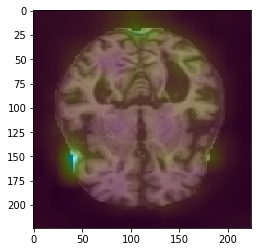

In [34]:
img_path = "../input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg"
show_heatmap(model_CBAM, img_path)